<a href="https://colab.research.google.com/github/ahmedtarek26/soccer-analytics-statsbomby/blob/main/Leverkusen_2023_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Install Dependencies


In [ ]:
# !pip install statsbombpy mplsoccer highlight_text plotly scikit-learn streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 4.0 MB/s eta 0:00:00


## Step 2: Create Visualizations


In [ ]:
# Check available columns in the matches DataFrame
matches = sb.matches(competition_id=9, season_id=281)
print(matches.columns)
print(matches.head())


Index(['match_id', 'match_date', 'kick_off', 'competition', 'season',
       'home_team', 'away_team', 'home_score', 'away_score', 'match_status',
       'match_status_360', 'last_updated', 'last_updated_360', 'match_week',
       'competition_stage', 'stadium', 'referee', 'home_managers',
       'away_managers', 'data_version', 'shot_fidelity_version',
       'xy_fidelity_version'],
      dtype='object')
   match_id  match_date      kick_off              competition     season  \
0   3895302  2024-04-14  17:30:00.000  Germany - 1. Bundesliga  2023/2024   
1   3895292  2024-04-06  15:30:00.000  Germany - 1. Bundesliga  2023/2024   
2   3895333  2024-05-05  18:30:00.000  Germany - 1. Bundesliga  2023/2024   
3   3895340  2024-05-12  20:30:00.000  Germany - 1. Bundesliga  2023/2024   
4   3895348  2024-05-18  16:30:00.000  Germany - 1. Bundesliga  2023/2024   

             home_team         away_team  home_score  away_score match_status  \
0     Bayer Leverkusen     Werder Bremen       

/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Found 34 matches for Bayer Leverkusen


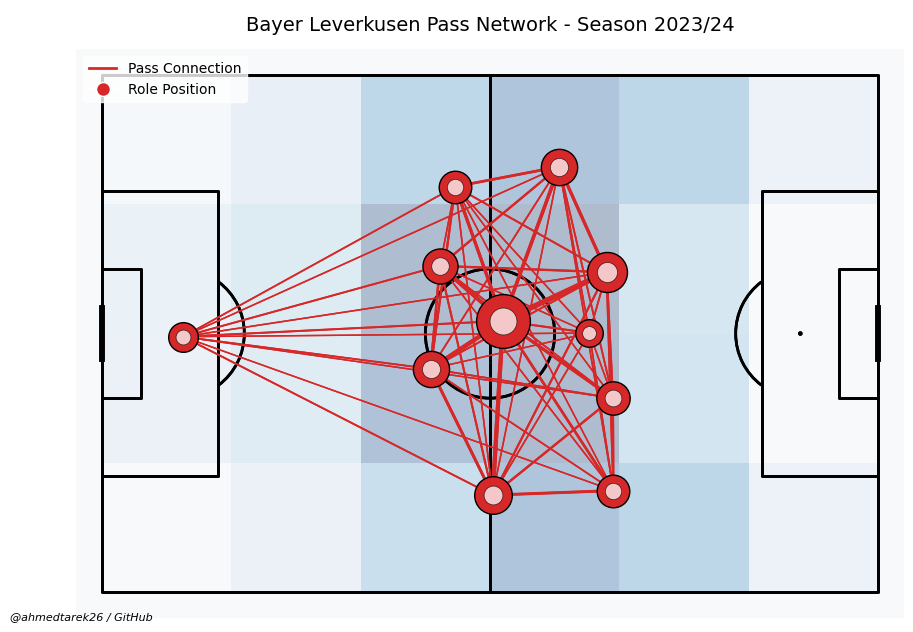

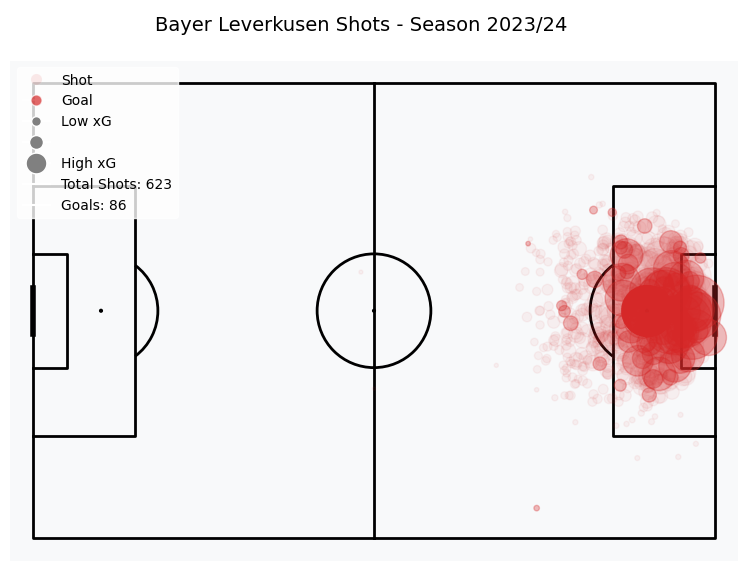


### Granit Xhaka


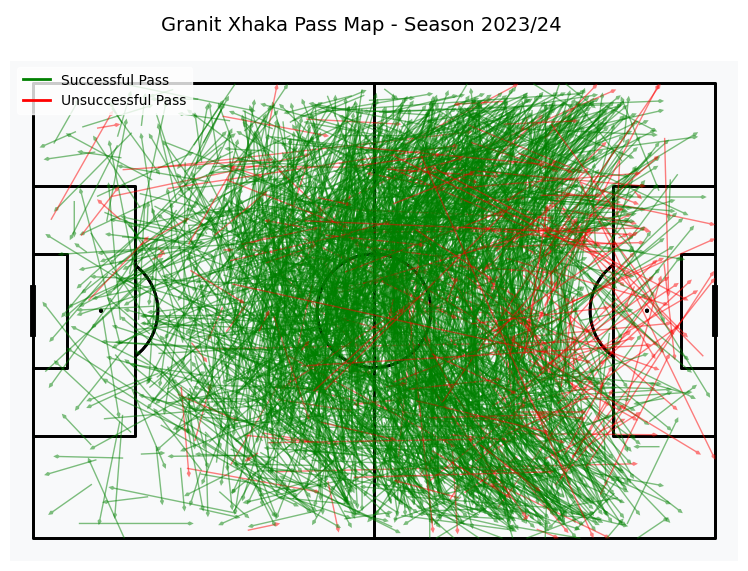

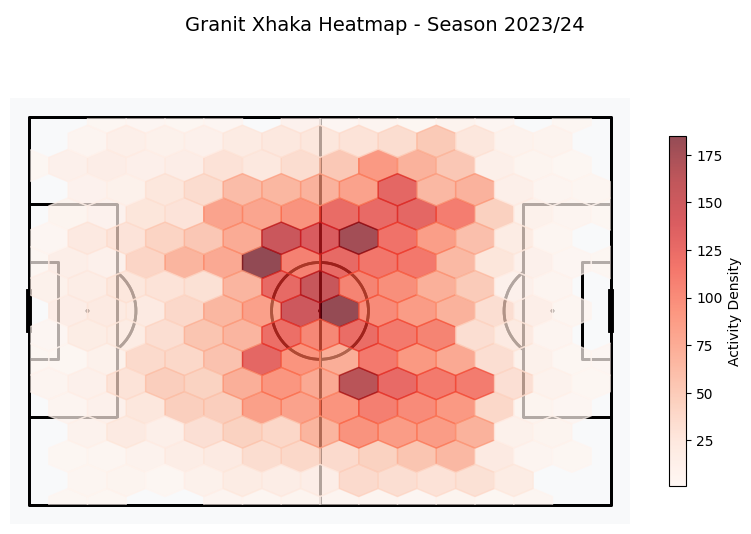

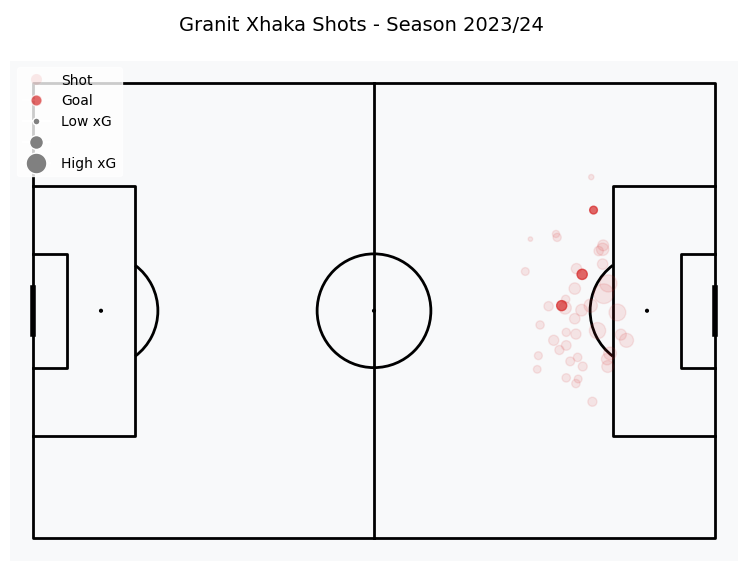

Granit Xhaka:
Total Passes: 3299, Pass Accuracy: 92.3%
Total Shots: 44, Goals: 3

### Florian Wirtz


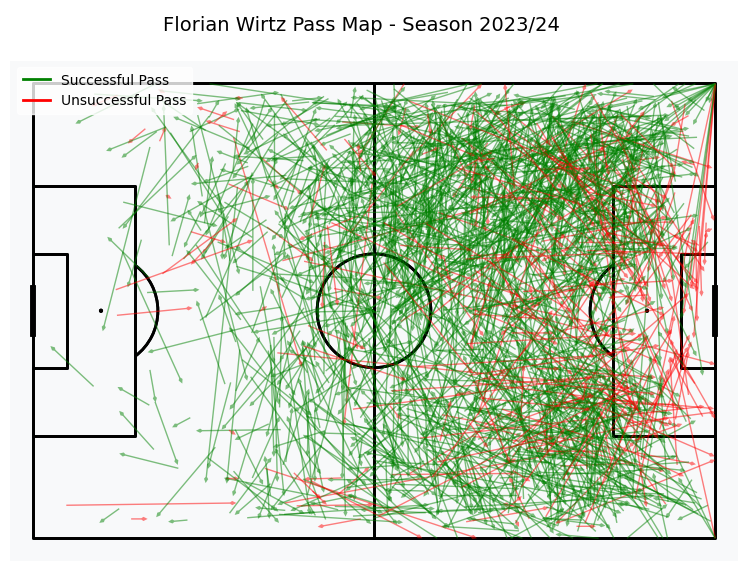

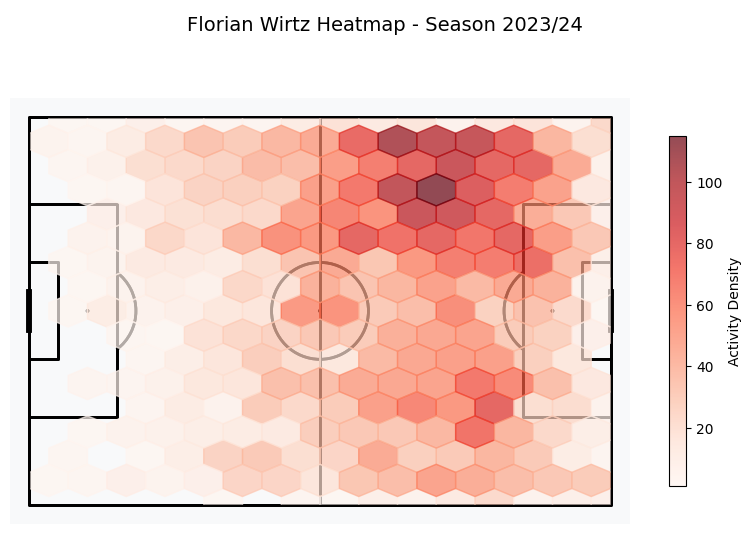

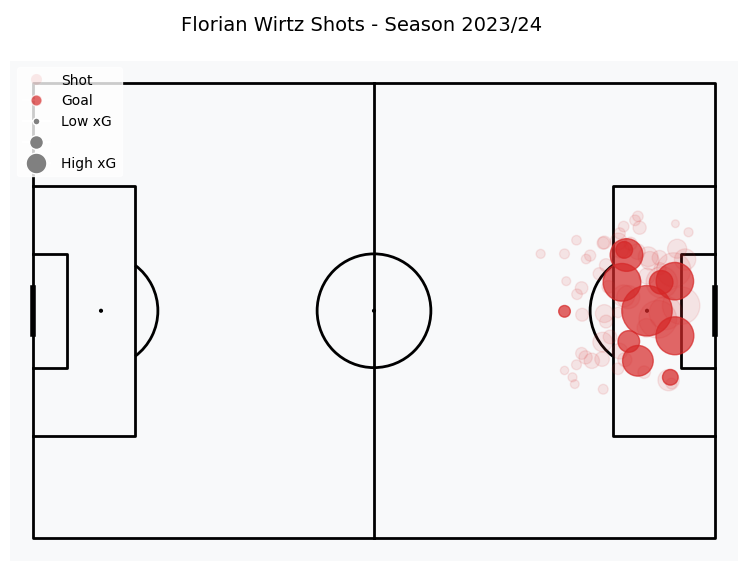

Florian Wirtz:
Total Passes: 1841, Pass Accuracy: 83.8%
Total Shots: 71, Goals: 11

### Jeremie Frimpong


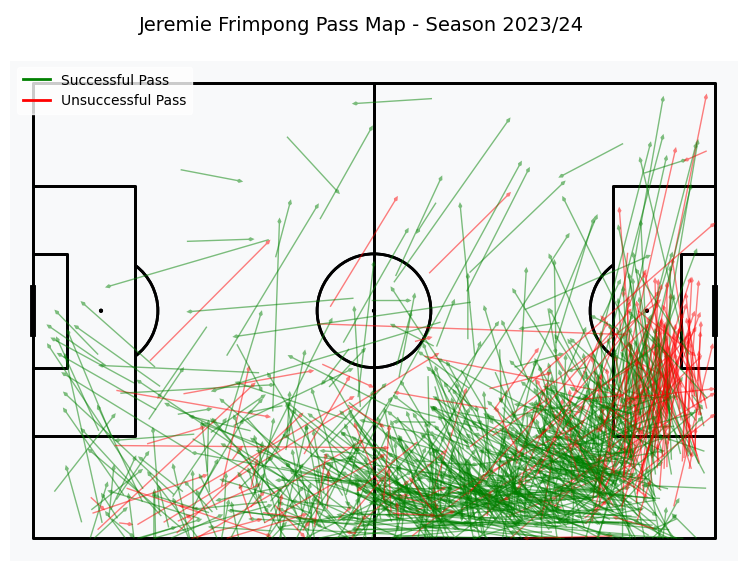

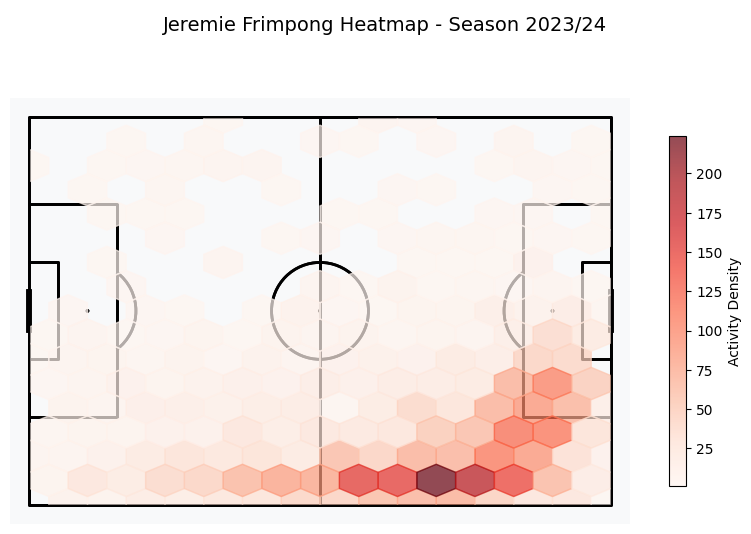

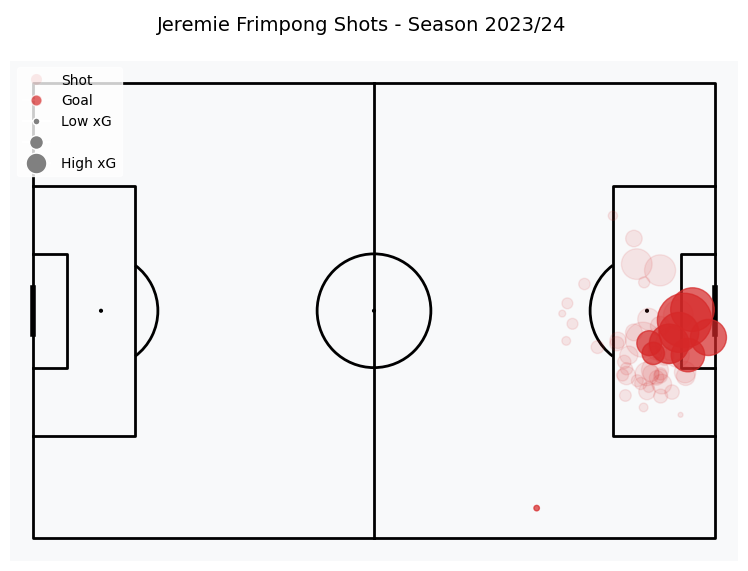

Jeremie Frimpong:
Total Passes: 1038, Pass Accuracy: 79.1%
Total Shots: 56, Goals: 9


In [ ]:
# Cell 1: Install libraries (run if needed)
# !pip install statsbombpy mplsoccer highlight_text plotly scikit-learn streamlit

# Cell 2: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsbombpy import sb
from mplsoccer.pitch import Pitch
from highlight_text import fig_text
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans
import os
import matplotlib.cm as cm

# Cell 3: Set up theme and constants
BG_COLOR = "#ffffff"
PITCH_COLOR = "#f8f9fa"
LINE_COLOR = "#000000"
TEXT_COLOR = "#000000"
TEAM_COLOR = "#d62828"  # Bayer Leverkusen red
FIG_BG_COLOR = "#ffffff"
FONT = 'DejaVu Sans'
FONT_BOLD = 'DejaVu Sans'
FONT_SIZE_SM = 10
FONT_SIZE_MD = 12
FONT_SIZE_LG = 14
FONT_SIZE_XL = 16
pitchWidthY = 80
season_display = "2023/24"

# Ensure graphs directory exists
os.makedirs('graphs', exist_ok=True)

# Cell 4: Retrieve matches
competition_id = 9
season_id = 281
team_name = "Bayer Leverkusen"
matches = sb.matches(competition_id=competition_id, season_id=season_id)
leverkusen_matches = matches[(matches['home_team'] == team_name) | (matches['away_team'] == team_name)]
match_ids = leverkusen_matches['match_id'].tolist()
print(f"Found {len(match_ids)} matches for {team_name}")

# Cell 5: Collect all events, passes, shots
all_events = []
all_passes = []
all_shots = []
for match_id in match_ids:
    events = sb.events(match_id=match_id)
    team_events = events[events['team'] == team_name]
    all_events.append(team_events)
    passes = team_events[team_events['type'] == 'Pass']
    all_passes.append(passes)
    shots = team_events[team_events['type'] == 'Shot']
    all_shots.append(shots)
all_events_df = pd.concat(all_events, ignore_index=True)
all_passes_df = pd.concat(all_passes, ignore_index=True)
all_shots_df = pd.concat(all_shots, ignore_index=True)

# Cell 6: Define visualization functions
def create_pitch_figure(title, figsize=(10, 6.5)):
    fig, ax = plt.subplots(figsize=figsize, facecolor=FIG_BG_COLOR)
    pitch = Pitch(pitch_type='statsbomb', line_color=LINE_COLOR, pitch_color=PITCH_COLOR)
    pitch.draw(ax=ax)
    plt.gca().invert_yaxis()
    fig_text(s=title, x=0.5, y=0.95, fontsize=FONT_SIZE_LG,
             color=TEXT_COLOR, fontfamily=FONT_BOLD, ha='center')
    return fig, ax

def save_and_display(fig, filename):
    fig.text(0.02, 0.02, '@ahmedtarek26 / GitHub',
             fontstyle='italic', fontsize=FONT_SIZE_SM-2,
             color=TEXT_COLOR, fontfamily=FONT)
    plt.tight_layout()
    plt.savefig(f'graphs/{filename}', dpi=300, bbox_inches='tight', facecolor=FIG_BG_COLOR)

def team_shots_graph(shots, team_name):
    fig, ax = create_pitch_figure(f'{team_name} Shots - Season {season_display}')
    for i, shot in shots.iterrows():
        x = shot['location'][0]
        y = shot['location'][1]
        goal = shot['shot_outcome'] == 'Goal'
        circleSize = np.sqrt(shot['shot_statsbomb_xg']) * 5
        alpha = 0.3 if goal else 0.05  # Reduced opacity for non-goals
        shotCircle = plt.Circle((x, pitchWidthY - y), circleSize,
                              color=TEAM_COLOR, alpha=alpha)
        ax.add_patch(shotCircle)
    total_shots = len(shots)
    goals = shots[shots['shot_outcome'] == 'Goal'].shape[0]
    goal_percentage = goals / total_shots * 100 if total_shots > 0 else 0
    # Legend with xG scale and additional stats
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Shot',
               markerfacecolor=TEAM_COLOR, markersize=8, alpha=0.1),
        Line2D([0], [0], marker='o', color='w', label='Goal',
               markerfacecolor=TEAM_COLOR, markersize=8, alpha=0.7),
        Line2D([0], [0], marker='o', color='w', label='Low xG',
               markerfacecolor='gray', markersize=7),
        Line2D([0], [0], marker='o', color='w', label='',
               markerfacecolor='gray', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='High xG',
               markerfacecolor='gray', markersize=15),
        Line2D([0], [0], marker='', color='w', label=f'Total Shots: {total_shots}',
               markersize=0),
        Line2D([0], [0], marker='', color='w', label=f'Goals: {goals}',
               markersize=0)
    ]
    legend = ax.legend(handles=legend_elements, loc='upper left',
                      facecolor=FIG_BG_COLOR, edgecolor=FIG_BG_COLOR)
    for text in legend.get_texts():
        text.set_color(TEXT_COLOR)
    plt.show()


def plot_player_pass_map(passes_df, player_name):
    player_passes = passes_df[passes_df['player'] == player_name]
    if player_passes.empty:
        print(f"No passes for {player_name}")
        return
    fig, ax = create_pitch_figure(f"{player_name} Pass Map - Season {season_display}")
    pitch = Pitch(pitch_type='statsbomb', line_color=LINE_COLOR, pitch_color=PITCH_COLOR)
    pitch.draw(ax=ax)
    for _, pass_event in player_passes.iterrows():
        start_x, start_y = pass_event['location'][0], pass_event['location'][1]
        end_x, end_y = pass_event['pass_end_location'][0], pass_event['pass_end_location'][1]
        if pd.isna(pass_event['pass_outcome']):
            color = 'green'  # Successful pass
        else:
            color = 'red'  # Unsuccessful pass
        pitch.arrows(start_x, start_y, end_x, end_y, ax=ax, color=color, width=1, headwidth=3, headlength=3, alpha=0.5)
    # Add legend for pass map
    legend_elements = [
        Line2D([0], [0], color='green', lw=2, label='Successful Pass'),
        Line2D([0], [0], color='red', lw=2, label='Unsuccessful Pass')
    ]
    ax.legend(handles=legend_elements, loc='upper left', facecolor=FIG_BG_COLOR, edgecolor=FIG_BG_COLOR)
    for text in ax.legend_.get_texts():
        text.set_color(TEXT_COLOR)
    plt.show()

def plot_player_heatmap(events_df, player_name, team_name):
    player_events = events_df[events_df['player'] == player_name]
    if player_events.empty:
        print(f"No events for {player_name}")
        return
    locations = player_events['location'].dropna()
    if len(locations) == 0:
        print(f"No location data for {player_name}")
        return
    x = [loc[0] for loc in locations]
    y = [loc[1] for loc in locations]
    fig, ax = create_pitch_figure(f"{player_name} Heatmap - Season {season_display}")
    pitch = Pitch(pitch_type='statsbomb', line_color=LINE_COLOR, pitch_color=PITCH_COLOR)
    pitch.draw(ax=ax)
    hb = pitch.hexbin(x, y, ax=ax, cmap='Reds', gridsize=15, alpha=0.7)
    cb = fig.colorbar(hb, ax=ax, shrink=0.7)
    cb.set_label('Activity Density', color=TEXT_COLOR)
    cb.ax.yaxis.set_tick_params(color=TEXT_COLOR)
    plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color=TEXT_COLOR)
    plt.show()

def plot_player_shots(shots_df, player_name):
    player_shots = shots_df[shots_df['player'] == player_name]
    if player_shots.empty:
        print(f"No shots for {player_name}")
        return
    fig, ax = create_pitch_figure(f"{player_name} Shots - Season {season_display}")
    for i, shot in player_shots.iterrows():
        x = shot['location'][0]
        y = shot['location'][1]
        goal = shot['shot_outcome'] == 'Goal'
        circleSize = np.sqrt(shot['shot_statsbomb_xg']) * 5
        alpha = 0.7 if goal else 0.1  # Reduced opacity for non-goals
        shotCircle = plt.Circle((x, pitchWidthY - y), circleSize,
                              color=TEAM_COLOR, alpha=alpha)
        ax.add_patch(shotCircle)
    # Legend with xG scale
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Shot',
               markerfacecolor=TEAM_COLOR, markersize=8, alpha=0.1),
        Line2D([0], [0], marker='o', color='w', label='Goal',
               markerfacecolor=TEAM_COLOR, markersize=8, alpha=0.7),
        Line2D([0], [0], marker='o', color='w', label='Low xG',
               markerfacecolor='gray', markersize=5),
        Line2D([0], [0], marker='o', color='w', label='',
               markerfacecolor='gray', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='High xG',
               markerfacecolor='gray', markersize=15),
    ]
    legend = ax.legend(handles=legend_elements, loc='upper left',
                      facecolor=FIG_BG_COLOR, edgecolor=FIG_BG_COLOR)
    for text in legend.get_texts():
        text.set_color(TEXT_COLOR)
    plt.show()

def player_stats(events_df, player_name):
    player_passes = events_df[(events_df['type'] == 'Pass') &
                            (events_df['player'] == player_name)]
    total_passes = len(player_passes)
    successful_passes = len(player_passes[player_passes['pass_outcome'].isna()])
    pass_accuracy = successful_passes / total_passes * 100 if total_passes > 0 else 0
    player_shots = events_df[(events_df['type'] == 'Shot') &
                           (events_df['player'] == player_name)]
    total_shots = len(player_shots)
    goals = len(player_shots[player_shots['shot_outcome'] == 'Goal'])
    print(f"{player_name}:")
    print(f"Total Passes: {total_passes}, Pass Accuracy: {pass_accuracy:.1f}%")
    print(f"Total Shots: {total_shots}, Goals: {goals}")

# Cell 7: Aggregate player positions and passes for pass network
successful_passes = all_passes_df[all_passes_df['pass_outcome'].isna()].copy()
successful_passes['x'] = successful_passes['location'].apply(lambda loc: loc[0])
successful_passes['y'] = successful_passes['location'].apply(lambda loc: loc[1])
player_avg_locations = successful_passes.groupby('player')[['x', 'y']].mean().reset_index()

# Use KMeans to cluster players into 11 roles
if len(player_avg_locations) >= 11:
    kmeans = KMeans(n_clusters=11, random_state=42)
    player_avg_locations['role'] = kmeans.fit_predict(player_avg_locations[['x', 'y']])
else:
    print("Not enough players for 11 clusters. Adjusting cluster count.")
    kmeans = KMeans(n_clusters=len(player_avg_locations), random_state=42)
    player_avg_locations['role'] = kmeans.fit_predict(player_avg_locations[['x', 'y']])

# Map players to roles
player_to_role = dict(zip(player_avg_locations['player'], player_avg_locations['role']))

# Assign roles to passes
successful_passes['passer_role'] = successful_passes['player'].map(player_to_role)
successful_passes['recipient_role'] = successful_passes['pass_recipient'].map(player_to_role)

# Aggregate passes between roles
role_pass_connections = successful_passes.groupby(['passer_role', 'recipient_role']).size().reset_index(name='count')
role_avg_locations = player_avg_locations.groupby('role')[['x', 'y']].mean().reset_index()

# Calculate total actions per role for bubble size
all_actions = pd.concat([all_passes_df, all_shots_df])
role_actions = all_actions.groupby(all_actions['player'].map(player_to_role))['player'].count().reset_index(name='action_count')
role_avg_locations = role_avg_locations.merge(role_actions, left_on='role', right_on='player', how='left').fillna(0)
role_avg_locations['marker_size'] = 300 + (1200 * (role_avg_locations['action_count'] / role_avg_locations['action_count'].max()))

# Plot team pass network
fig, ax = create_pitch_figure(f"Bayer Leverkusen Pass Network - Season {season_display}")
pitch = Pitch(pitch_type='statsbomb', line_color=LINE_COLOR, pitch_color=PITCH_COLOR)
pitch.draw(ax=ax)

# Add heatmap
heatmap_bins = (6, 4)
bs_heatmap = pitch.bin_statistic(successful_passes['x'], successful_passes['y'], statistic='count', bins=heatmap_bins)
pitch.heatmap(bs_heatmap, ax=ax, cmap='Blues', alpha=0.3, zorder=0.5)

# Plot role positions without text
for _, row in role_avg_locations.iterrows():
    role = row['role']
    x = row['x']
    y = row['y']
    marker_size = row['marker_size']
    ax.scatter(x, y, s=marker_size, color=TEAM_COLOR, edgecolors='black', zorder=2)
    ax.scatter(x, y, s=marker_size/4, color='white', edgecolors='black', linewidth=0.5, alpha=0.75, zorder=3)

# Plot pass connections with varying thickness
max_passes = role_pass_connections['count'].max()
for _, row in role_pass_connections.iterrows():
    passer_role = row['passer_role']
    recipient_role = row['recipient_role']
    count = row['count']
    if count > 0:
        passer_loc = role_avg_locations[role_avg_locations['role'] == passer_role][['x', 'y']].values[0]
        recipient_loc = role_avg_locations[role_avg_locations['role'] == recipient_role][['x', 'y']].values[0]
        width = 1 + 4 * (count / max_passes)
        pitch.lines(passer_loc[0], passer_loc[1], recipient_loc[0], recipient_loc[1],
                   lw=width, color=TEAM_COLOR, zorder=1, ax=ax)

# Add legend for pass network
legend_elements = [
    Line2D([0], [0], color=TEAM_COLOR, lw=2, label='Pass Connection'),
    Line2D([0], [0], marker='o', color='w', label='Role Position',
           markerfacecolor=TEAM_COLOR, markersize=10)
]
legend = ax.legend(handles=legend_elements, loc='upper left',
                  facecolor=FIG_BG_COLOR, edgecolor=FIG_BG_COLOR)
for text in legend.get_texts():
    text.set_color(TEXT_COLOR)
save_and_display(fig, f'pass_network_{team_name}.png')

# Cell 8: Team shots graph
team_shots_graph(all_shots_df, team_name)

# Cell 9: Player analyses
players = ["Granit Xhaka", "Florian Wirtz", "Jeremie Frimpong"]
for player in players:
    print(f"\n### {player}")
    plot_player_pass_map(all_passes_df, player)
    plot_player_heatmap(all_events_df, player, team_name)
    plot_player_shots(all_shots_df, player)
    player_stats(all_events_df, player)

### Rada Plot

Found 34 matches for Bayer Leverkusen

### Granit Xhaka
Granit Xhaka:
Total Passes: 3299, Pass Accuracy: 92.3%
Total Shots: 44, Goals: 3

### Florian Wirtz
Florian Wirtz:
Total Passes: 1841, Pass Accuracy: 83.8%
Total Shots: 71, Goals: 11

### Jeremie Frimpong
Jeremie Frimpong:
Total Passes: 1038, Pass Accuracy: 79.1%
Total Shots: 56, Goals: 9


TypeError: Radar.__init__() got an unexpected keyword argument 'param'

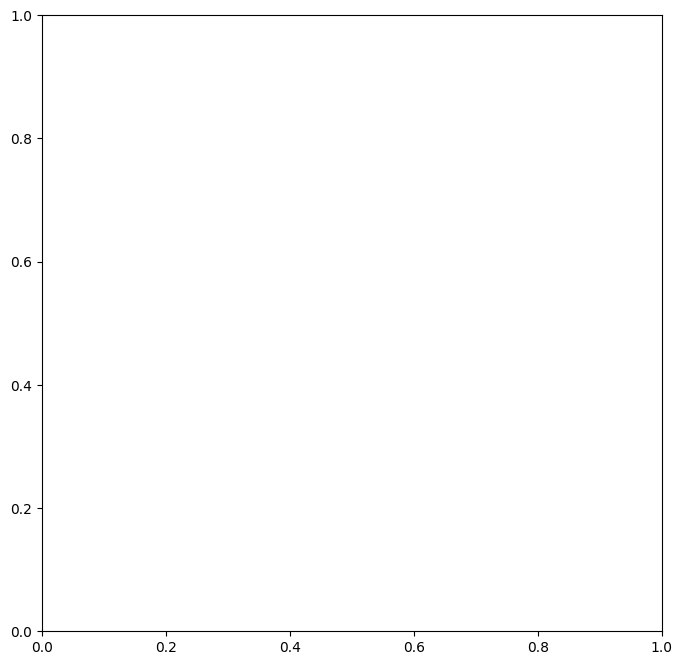

In [26]:
# Cell 1: Install libraries (run if needed)
# !pip install statsbombpy mplsoccer highlight_text plotly scikit-learn

# Cell 2: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsbombpy import sb
from mplsoccer import Pitch, Radar
from highlight_text import fig_text
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from sklearn.cluster import KMeans

# Cell 3: Set up theme and constants
BG_COLOR = "#ffffff"
PITCH_COLOR = "#f8f9fa"
LINE_COLOR = "#000000"
TEXT_COLOR = "#000000"
TEAM_COLOR = "#d62828"  # Bayer Leverkusen red
FIG_BG_COLOR = "#ffffff"
FONT = 'DejaVu Sans'
FONT_BOLD = 'DejaVu Sans'
FONT_SIZE_SM = 10
FONT_SIZE_MD = 12
FONT_SIZE_LG = 14
FONT_SIZE_XL = 16
pitchWidthY = 80
season_display = "2023/24"

# Ensure graphs directory exists
import os
os.makedirs('graphs', exist_ok=True)

# Cell 4: Retrieve matches
competition_id = 9
season_id = 281
team_name = "Bayer Leverkusen"
matches = sb.matches(competition_id=competition_id, season_id=season_id)
leverkusen_matches = matches[(matches['home_team'] == team_name) | (matches['away_team'] == team_name)]
match_ids = leverkusen_matches['match_id'].tolist()
print(f"Found {len(match_ids)} matches for {team_name}")

# Cell 5: Collect all events, passes, shots, and lineup data with error handling
all_events = []
all_passes = []
all_shots = []
all_lineups = []
for match_id in match_ids:
    events = sb.events(match_id=match_id)
    team_events = events[events['team'] == team_name]
    all_events.append(team_events)
    passes = team_events[team_events['type'] == 'Pass']
    all_passes.append(passes)
    shots = team_events[team_events['type'] == 'Shot']
    all_shots.append(shots)

    lineup_data = sb.lineups(match_id=match_id)
    for side in ['home', 'away']:
        if side in lineup_data:
            side_df = lineup_data[side].copy()
            side_df['match_id'] = match_id
            side_df['side'] = side
            all_lineups.append(side_df)
        else:
            print(f"Warning: No lineup data for {side} in match {match_id}")

all_events_df = pd.concat(all_events, ignore_index=True)
all_passes_df = pd.concat(all_passes, ignore_index=True)
all_shots_df = pd.concat(all_shots, ignore_index=True)
all_player_match_data = pd.concat(all_lineups, ignore_index=True) if all_lineups else pd.DataFrame({'match_id': match_ids})

# Add player_team column to all_player_match_data
if not all_player_match_data.empty and 'match_id' in all_player_match_data.columns:
    match_details = matches[['match_id', 'home_team', 'away_team']]
    all_player_match_data = all_player_match_data.merge(match_details, on='match_id', how='left')
    if 'side' in all_player_match_data.columns:
        all_player_match_data['player_team'] = np.where(all_player_match_data['side'] == 'home', all_player_match_data['home_team'], all_player_match_data['away_team'])
    else:
        print("Warning: 'side' column missing. Setting player_team based on home_team.")
        all_player_match_data['player_team'] = all_player_match_data['home_team']
else:
    print("Warning: No lineup data available. Proceeding without player match data.")
    all_player_match_data = pd.DataFrame({'match_id': match_ids}).merge(matches[['match_id', 'home_team', 'away_team']], on='match_id', how='left')
    all_player_match_data['player_team'] = all_player_match_data['home_team']

# Filter for Bayer Leverkusen players
leverkusen_players = all_player_match_data[all_player_match_data['player_team'] == team_name]

# Calculate total minutes per player (will be empty if no lineup data)
total_minutes_per_player = leverkusen_players.groupby('player_name')['minutes'].sum().reset_index() if 'player_name' in leverkusen_players.columns else pd.DataFrame({'player_name': [], 'minutes': []})
if total_minutes_per_player.empty:
    print("Warning: No minutes data available from lineups. Estimating from events.")

# Cell 6: Define visualization functions
def create_pitch_figure(title, figsize=(10, 6.5)):
    fig, ax = plt.subplots(figsize=figsize, facecolor=FIG_BG_COLOR)
    pitch = Pitch(pitch_type='statsbomb', line_color=LINE_COLOR, pitch_color=PITCH_COLOR)
    pitch.draw(ax=ax)
    plt.gca().invert_yaxis()
    fig_text(s=title, x=0.5, y=0.95, fontsize=FONT_SIZE_LG,
             color=TEXT_COLOR, fontfamily=FONT_BOLD, ha='center')
    return fig, ax

def save_and_display(fig, filename):
    fig.text(0.02, 0.02, '@ahmedtarek26 / GitHub',
             fontstyle='italic', fontsize=FONT_SIZE_SM-2,
             color=TEXT_COLOR, fontfamily=FONT)
    plt.tight_layout()
    plt.savefig(f'graphs/{filename}', dpi=300, bbox_inches='tight', facecolor=FIG_BG_COLOR)
    plt.close(fig)

def team_shots_graph(shots, team_name):
    fig, ax = create_pitch_figure(f'{team_name} Shots - Season {season_display}')
    for i, shot in shots.iterrows():
        x = shot['location'][0]
        y = shot['location'][1]
        goal = shot['shot_outcome'] == 'Goal'
        circleSize = np.sqrt(shot['shot_statsbomb_xg']) * 5
        alpha = 0.7 if goal else 0.1
        shotCircle = plt.Circle((x, pitchWidthY - y), circleSize,
                              color=TEAM_COLOR, alpha=alpha)
        ax.add_patch(shotCircle)
    total_shots = len(shots)
    goals = shots[shots['shot_outcome'] == 'Goal'].shape[0]
    goal_percentage = goals / total_shots * 100 if total_shots > 0 else 0
    xg_values = [0.05, 0.2, 0.5, 1.0]
    xg_sizes = [np.sqrt(xg) * 5 for xg in xg_values]
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Shot',
               markerfacecolor=TEAM_COLOR, markersize=8, alpha=0.1),
        Line2D([0], [0], marker='o', color='w', label='Goal',
               markerfacecolor=TEAM_COLOR, markersize=8, alpha=0.7),
        Line2D([0], [0], marker='o', color='w', label='Low xG',
               markerfacecolor='gray', markersize=xg_sizes[0]),
        Line2D([0], [0], marker='o', color='w', label='',
               markerfacecolor='gray', markersize=xg_sizes[1]),
        Line2D([0], [0], marker='o', color='w', label='',
               markerfacecolor='gray', markersize=xg_sizes[2]),
        Line2D([0], [0], marker='o', color='w', label='High xG',
               markerfacecolor='gray', markersize=xg_sizes[3]),
        Line2D([0], [0], marker='', color='w', label=f'Total Shots: {total_shots}',
               markersize=0),
        Line2D([0], [0], marker='', color='w', label=f'Goals: {goals}, Goal Percentage: {goal_percentage:.1f}%',
               markersize=0)
    ]
    legend = ax.legend(handles=legend_elements, loc='upper left',
                      facecolor=FIG_BG_COLOR, edgecolor=FIG_BG_COLOR)
    for text in legend.get_texts():
        text.set_color(TEXT_COLOR)
    save_and_display(fig, f'shots_{team_name}.png')

def plot_player_pass_map(passes_df, player_name):
    player_passes = passes_df[passes_df['player'] == player_name]
    if player_passes.empty:
        print(f"No passes for {player_name}")
        return
    fig, ax = create_pitch_figure(f"{player_name} Pass Map - Season {season_display}")
    pitch = Pitch(pitch_type='statsbomb', line_color=LINE_COLOR, pitch_color=PITCH_COLOR)
    pitch.draw(ax=ax)
    for _, pass_event in player_passes.iterrows():
        start_x, start_y = pass_event['location'][0], pass_event['location'][1]
        end_x, end_y = pass_event['pass_end_location'][0], pass_event['pass_end_location'][1]
        if pd.isna(pass_event['pass_outcome']):
            color = 'green'
        else:
            color = 'red'
        pitch.arrows(start_x, start_y, end_x, end_y, ax=ax, color=color, width=1, headwidth=3, headlength=3, alpha=0.5)
    legend_elements = [
        Line2D([0], [0], color='green', lw=2, label='Successful Pass'),
        Line2D([0], [0], color='red', lw=2, label='Unsuccessful Pass')
    ]
    ax.legend(handles=legend_elements, loc='upper left', facecolor=FIG_BG_COLOR, edgecolor=FIG_BG_COLOR)
    for text in ax.legend_.get_texts():
        text.set_color(TEXT_COLOR)
    save_and_display(fig, f'pass_map_{player_name}.png')

def plot_player_heatmap(events_df, player_name, team_name):
    player_events = events_df[events_df['player'] == player_name]
    if player_events.empty:
        print(f"No events for {player_name}")
        return
    locations = player_events['location'].dropna()
    if len(locations) == 0:
        print(f"No location data for {player_name}")
        return
    x = [loc[0] for loc in locations]
    y = [loc[1] for loc in locations]
    fig, ax = create_pitch_figure(f"{player_name} Heatmap - Season {season_display}")
    pitch = Pitch(pitch_type='statsbomb', line_color=LINE_COLOR, pitch_color=PITCH_COLOR)
    pitch.draw(ax=ax)
    hb = pitch.hexbin(x, y, ax=ax, cmap='Reds', gridsize=15, alpha=0.7)
    cb = fig.colorbar(hb, ax=ax, shrink=0.7)
    cb.set_label('Activity Density', color=TEXT_COLOR)
    cb.ax.yaxis.set_tick_params(color=TEXT_COLOR)
    plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color=TEXT_COLOR)
    save_and_display(fig, f'heatmap_{player_name}.png')

def plot_player_shots(shots_df, player_name):
    player_shots = shots_df[shots_df['player'] == player_name]
    if player_shots.empty:
        print(f"No shots for {player_name}")
        return
    fig, ax = create_pitch_figure(f"{player_name} Shots - Season {season_display}")
    for i, shot in player_shots.iterrows():
        x = shot['location'][0]
        y = shot['location'][1]
        goal = shot['shot_outcome'] == 'Goal'
        circleSize = np.sqrt(shot['shot_statsbomb_xg']) * 5
        alpha = 0.7 if goal else 0.1
        shotCircle = plt.Circle((x, pitchWidthY - y), circleSize,
                              color=TEAM_COLOR, alpha=alpha)
        ax.add_patch(shotCircle)
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Shot',
               markerfacecolor=TEAM_COLOR, markersize=8, alpha=0.1),
        Line2D([0], [0], marker='o', color='w', label='Goal',
               markerfacecolor=TEAM_COLOR, markersize=8, alpha=0.7),
        Line2D([0], [0], marker='o', color='w', label='Low xG',
               markerfacecolor='gray', markersize=5),
        Line2D([0], [0], marker='o', color='w', label='',
               markerfacecolor='gray', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='High xG',
               markerfacecolor='gray', markersize=15),
    ]
    legend = ax.legend(handles=legend_elements, loc='upper left',
                      facecolor=FIG_BG_COLOR, edgecolor=FIG_BG_COLOR)
    for text in legend.get_texts():
        text.set_color(TEXT_COLOR)
    save_and_display(fig, f'shots_{player_name}.png')

def player_stats(events_df, player_name):
    player_passes = events_df[(events_df['type'] == 'Pass') &
                            (events_df['player'] == player_name)]
    total_passes = len(player_passes)
    successful_passes = len(player_passes[player_passes['pass_outcome'].isna()])
    pass_accuracy = successful_passes / total_passes * 100 if total_passes > 0 else 0
    player_shots = events_df[(events_df['type'] == 'Shot') &
                           (events_df['player'] == player_name)]
    total_shots = len(player_shots)
    goals = len(player_shots[player_shots['shot_outcome'] == 'Goal'])
    print(f"{player_name}:")
    print(f"Total Passes: {total_passes}, Pass Accuracy: {pass_accuracy:.1f}%")
    print(f"Total Shots: {total_shots}, Goals: {goals}")

# Cell 7: Aggregate player positions and passes for pass network
successful_passes = all_passes_df[all_passes_df['pass_outcome'].isna()].copy()
successful_passes['x'] = successful_passes['location'].apply(lambda loc: loc[0])
successful_passes['y'] = successful_passes['location'].apply(lambda loc: loc[1])
player_avg_locations = successful_passes.groupby('player')[['x', 'y']].mean().reset_index()

# Use KMeans to cluster players into 11 roles
if len(player_avg_locations) >= 11:
    kmeans = KMeans(n_clusters=11, random_state=42)
    player_avg_locations['role'] = kmeans.fit_predict(player_avg_locations[['x', 'y']])
else:
    print("Not enough players for 11 clusters. Adjusting cluster count.")
    kmeans = KMeans(n_clusters=len(player_avg_locations), random_state=42)
    player_avg_locations['role'] = kmeans.fit_predict(player_avg_locations[['x', 'y']])

# Map players to roles
player_to_role = dict(zip(player_avg_locations['player'], player_avg_locations['role']))

# Assign roles to passes
successful_passes['passer_role'] = successful_passes['player'].map(player_to_role)
successful_passes['recipient_role'] = successful_passes['pass_recipient'].map(player_to_role)

# Aggregate passes between roles
role_pass_connections = successful_passes.groupby(['passer_role', 'recipient_role']).size().reset_index(name='count')
role_avg_locations = player_avg_locations.groupby('role')[['x', 'y']].mean().reset_index()

# Calculate total actions per role for bubble size
all_actions = pd.concat([all_passes_df, all_shots_df])
role_actions = all_actions.groupby(all_actions['player'].map(player_to_role))['player'].count().reset_index(name='action_count')
role_avg_locations = role_avg_locations.merge(role_actions, left_on='role', right_on='player', how='left').fillna(0)
role_avg_locations['marker_size'] = 300 + (1200 * (role_avg_locations['action_count'] / role_avg_locations['action_count'].max()))

# Plot team pass network
fig, ax = create_pitch_figure(f"Bayer Leverkusen Pass Network - Season {season_display}")
pitch = Pitch(pitch_type='statsbomb', line_color=LINE_COLOR, pitch_color=PITCH_COLOR)
pitch.draw(ax=ax)

# Add heatmap
heatmap_bins = (6, 4)
bs_heatmap = pitch.bin_statistic(successful_passes['x'], successful_passes['y'], statistic='count', bins=heatmap_bins)
pitch.heatmap(bs_heatmap, ax=ax, cmap='Blues', alpha=0.3, zorder=0.5)

# Plot role positions without text
for _, row in role_avg_locations.iterrows():
    role = row['role']
    x = row['x']
    y = row['y']
    marker_size = row['marker_size']
    ax.scatter(x, y, s=marker_size, color=TEAM_COLOR, edgecolors='black', zorder=2)
    ax.scatter(x, y, s=marker_size/4, color='white', edgecolors='black', linewidth=0.5, alpha=0.75, zorder=3)

# Plot pass connections with varying thickness
max_passes = role_pass_connections['count'].max()
for _, row in role_pass_connections.iterrows():
    passer_role = row['passer_role']
    recipient_role = row['recipient_role']
    count = row['count']
    if count > 0:
        passer_loc = role_avg_locations[role_avg_locations['role'] == passer_role][['x', 'y']].values[0]
        recipient_loc = role_avg_locations[role_avg_locations['role'] == recipient_role][['x', 'y']].values[0]
        width = 1 + 4 * (count / max_passes)
        pitch.lines(passer_loc[0], passer_loc[1], recipient_loc[0], recipient_loc[1],
                   lw=width, color=TEAM_COLOR, zorder=1, ax=ax)

# Add legend for pass network
legend_elements = [
    Line2D([0], [0], color=TEAM_COLOR, lw=2, label='Pass Connection'),
    Line2D([0], [0], marker='o', color='w', label='Role Position',
           markerfacecolor=TEAM_COLOR, markersize=10)
]
legend = ax.legend(handles=legend_elements, loc='upper left',
                  facecolor=FIG_BG_COLOR, edgecolor=FIG_BG_COLOR)
for text in legend.get_texts():
    text.set_color(TEXT_COLOR)
save_and_display(fig, f'pass_network_{team_name}.png')

# Cell 8: Team shots graph
team_shots_graph(all_shots_df, team_name)

# Cell 9: Player analyses
players = ["Granit Xhaka", "Florian Wirtz", "Jeremie Frimpong"]
for player in players:
    print(f"\n### {player}")
    plot_player_pass_map(all_passes_df, player)
    plot_player_heatmap(all_events_df, player, team_name)
    plot_player_shots(all_shots_df, player)
    player_stats(all_events_df, player)

# Cell 10: Calculate player statistics for radar plots
player_matches = all_events_df.groupby('player')['match_id'].nunique().reset_index(name='matches_played')
player_matches['total_minutes'] = player_matches['matches_played'] * 90  # Estimate 90 minutes per match
total_minutes = player_matches.set_index('player')['total_minutes']

player_stats = []
for player in players:
    if player not in total_minutes.index:
        print(f"No events for {player}, assuming 0 minutes")
        continue
    minutes = total_minutes.loc[player]

    # Goals
    goals = len(all_events_df[(all_events_df['type'] == 'Shot') & (all_events_df['shot_outcome'] == 'Goal') & (all_events_df['player'] == player)])

    # Shots
    shots = len(all_events_df[(all_events_df['type'] == 'Shot') & (all_events_df['player'] == player)])

    # Successful passes
    successful_passes = len(all_events_df[(all_events_df['type'] == 'Pass') & (all_events_df['pass_outcome'].isna()) & (all_events_df['player'] == player)])

    # Total passes
    total_passes = len(all_events_df[(all_events_df['type'] == 'Pass') & (all_events_df['player'] == player)])

    # Tackles won
    if 'tackle_outcome' in all_events_df.columns:
        tackles_won = len(all_events_df[(all_events_df['type'] == 'Tackle') & (all_events_df['tackle_outcome'] == 'Success') & (all_events_df['player'] == player)])
    else:
        tackles_won = 0
        print(f"Warning: 'tackle_outcome' column missing for {player}. Setting tackles to 0.")

    # Interceptions
    interceptions = len(all_events_df[(all_events_df['type'] == 'Interception') & (all_events_df['player'] == player)])

    # Aerial duels won
    if 'aerial_duel_outcome' in all_events_df.columns:
        aerial_duels_won = len(all_events_df[(all_events_df['type'] == 'Aerial') & (all_events_df['aerial_duel_outcome'] == 'Won') & (all_events_df['player'] == player)])
    else:
        aerial_duels_won = 0
        print(f"Warning: 'aerial_duel_outcome' column missing for {player}. Setting aerial duels to 0.")

    # Per 90 minutes
    goals_per90 = goals / (minutes / 90) if minutes > 0 else 0
    shots_per90 = shots / (minutes / 90) if minutes > 0 else 0
    passes_completed_per90 = successful_passes / (minutes / 90) if minutes > 0 else 0
    tackles_per90 = tackles_won / (minutes / 90) if minutes > 0 else 0
    interceptions_per90 = interceptions / (minutes / 90) if minutes > 0 else 0
    aerial_duels_won_per90 = aerial_duels_won / (minutes / 90) if minutes > 0 else 0

    player_data = {
        'player_name': player,
        'goals_per90': goals_per90,
        'shots_per90': shots_per90,
        'passes_completed_per90': passes_completed_per90,
        'tackles_per90': tackles_per90,
        'interceptions_per90': interceptions_per90,
        'aerial_duels_won_per90': aerial_duels_won_per90,
        'total_minutes': minutes
    }
    player_stats.append(player_data)

player_stats_df = pd.DataFrame(player_stats)

# Cell 11: Create radar plots for specified players
if not player_stats_df.empty:
    players_to_plot = ["Granit Xhaka", "Florian Wirtz", "Jeremie Frimpong"]
    player_data = player_stats_df[player_stats_df['player_name'].isin(players_to_plot)]
    labels = ['Goals/90', 'Shots/90', 'Passes Completed/90', 'Tackles/90', 'Interceptions/90', 'Aerial Duels Won/90']
    max_values = [
        max(player_data['goals_per90'].max(), 0.1) if not player_data.empty else 0.1,
        max(player_data['shots_per90'].max(), 1.0) if not player_data.empty else 1.0,
        max(player_data['passes_completed_per90'].max(), 50.0) if not player_data.empty else 50.0,
        max(player_data['tackles_per90'].max(), 1.0) if not player_data.empty else 1.0,
        max(player_data['interceptions_per90'].max(), 1.0) if not player_data.empty else 1.0,
        max(player_data['aerial_duels_won_per90'].max(), 1.0) if not player_data.empty else 1.0
    ]
    min_values = [0] * len(labels)
    fig, ax = plt.subplots(figsize=(8, 8))
    radar = Radar(param=labels, min_value=min_values, max_value=max_values)
    colors = ['red', 'blue', 'green']
    for i, row in player_data.iterrows():
        values = [
            row['goals_per90'],
            row['shots_per90'],
            row['passes_completed_per90'],
            row['tackles_per90'],
            row['interceptions_per90'],
            row['aerial_duels_won_per90']
        ]
        radar.plot(values, ax=ax, color=colors[i], marker='o', s=20, alpha=0.5, label=row['player_name'])
    ax.legend(loc='upper right', fontsize=10)
    fig_text(s=f"Player Comparison Radar - Season {season_display}", x=0.5, y=0.95, fontsize=FONT_SIZE_LG,
             color=TEXT_COLOR, fontfamily=FONT_BOLD, ha='center')
    save_and_display(fig, 'player_radar_comparison.png')
else:
    print("No player statistics available for radar plots.")